
# Issue: [Word Distribution Trends](https://github.com/humlab/welfare_state_analytics/issues/10)

To consider:

- How to normalize the distributions? Normalize each words distribution to 1.
- What clustering to use? Ward? Try K-means to start with.
- UX two select different kinds of clusters

## Find words that deviates the most from uniform distribution
1. Compute using chi-square test
1. Visualisera distribution of "godness value" ("how many word deviates how much")
1. List words that for which the null-hypothesis is true 0.05

## Compute distribution clusters for most deviating words
1. Select n (=500) words that deviates the most.
1. Select n clusters that covers 9+% all words.
1. Visualize single cluster
    - Mean / scatter / box-plot
1. Visualize all clusters
    - Each represented as a mean curve
1. Export individual words for each cluster

Notes:

- Word filters

Issues:

- Scale insted of normalize???


References
----------

- [1] Lowry, Richard.  "Concepts and Applications of Inferential Statistics". Chapter 8. https://web.archive.org/web/20171022032306/http://vassarstats.net:80/textbook/ch8pt1.html
- [2] "Chi-squared test", https://en.wikipedia.org/wiki/Chi-squared_test



In [2]:
import operator

from westac.common import vectorized_corpus

import scipy
import scipy.stats
import numpy as np
import pandas as pd

v_corpus = vectorized_corpus.VectorizedCorpus\
            .load('SOU_1945-1989_A', folder='./output')\
            .group_by_year()\
            #.normalize(axis=1)
            #.slice_by_n_top(10000)
            #.normalize(axis=1)
            #.slice_by_n_count(1000)\

# Normalize to relative frequency (sum over year == 1.0)
v_nw_corpus = v_corpus.normalize(axis=1)

v_corpus.stats;
v_nw_corpus.stats;

n_top_tokens = v_corpus.n_top_tokens(1000)

df = pd.DataFrame({ 'word': list(n_top_tokens.keys()), 'word_count': list(n_top_tokens.values()) })


Verify that sum over all years is 45:

In [58]:
print(v_n_corpus.bag_term_matrix.sum())

45.000000000000014


Normalize also over all words:

In [ ]:
v_ny_nw_corpus

In [50]:
v_n_corpus.bag_term_matrix[0,:].shape

(4801059,)

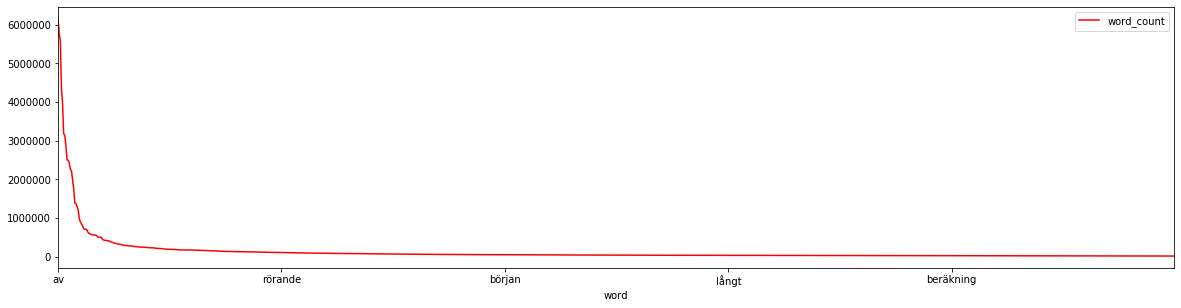

In [31]:
import matplotlib

matplotlib.rcParams["figure.figsize"] = [20, 4.8] 

df.plot(x='word', y='word_count',color='red')


In [24]:
#' '.join(v_corpus.n_top_tokens(100).keys())
v_corpus.token2id['av']
# v_corpus.slice_by_n_top(100).normalize(axis=1).bag_term_matrix
v_corpus.bag_term_matrix[:,461395]



AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [36]:
chisq, p = scipy.stats.chisquare(v_corpus.bag_term_matrix[:, 99])

p


0.47164197846382305

In [5]:
print(v_corpus.bag_term_matrix.shape)
#print('Counts: {}'.format(len(chisq)))
#print(chisq[:20])
#print(p_value[:20])
print([ v_corpus.id2token[i] for i in range(0,21) ])
print([ v_corpus.word_counts[v_corpus.id2token[i]] for i in range(0,21) ])


In [4]:
def stat_count_by_n_count(v_corpus, n_bins=100, cumulative=False):

    # n_bins = max(v_corpus.word_counts.iteritems(), key=operator.itemgetter(1))[0]

    bins = [ 0 ] * (n_bins + 1)

    for _, n_count in v_corpus.word_counts.items():
        bins[min(n_count, n_bins - 1)] += 1

    if cumulative:
        bins = np.cumsum(bins).tolist()

    return bins

def letters_in_corpus(v_corpus):
    letters = {}
    for w,n in v_corpus.word_counts.items():
        for c in w:
            letters[c] = letters.get(c,0) + n
    return ''.join(list(sorted(letters.keys())))

stat_count_by_n_count(v_corpus)


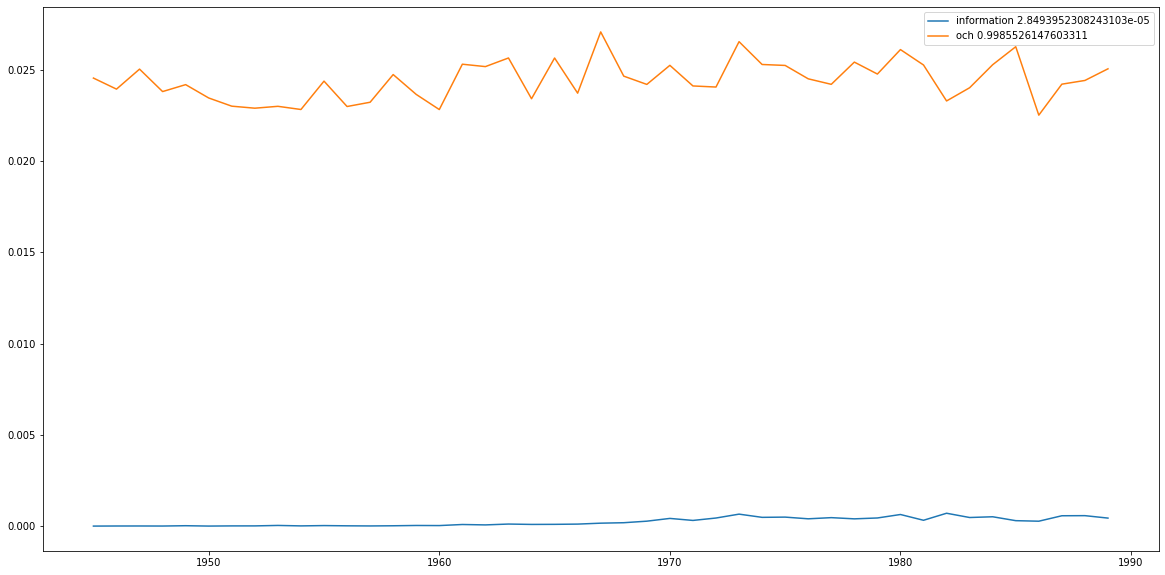

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
from westac.common.utility import flatten

def plot_words(v_corpus, words):

    indices = [ v_corpus.token2id[w] for w in words if w in v_corpus.token2id ]

    _, p = scipy.stats.chisquare(10000 * v_corpus.bag_term_matrix[:,indices], axis=0)

    labels = [ '{} {}'.format(v_corpus.id2token[indices[i]], p[i]) for i in range(len(indices)) ]

    T = [ i + 1945 for i in range(v_corpus.bag_term_matrix.shape[0]) ]

    data = tuple(flatten([ (T, v_corpus.bag_term_matrix[:,i]) for i in indices ]))
    
    plt.figure(figsize=(20,10)) 
    plt.plot(*data)
    plt.gca().legend(tuple(labels))
    plt.show()
    

plot_words(v_n_corpus, ["information", "och"])


In [17]:
import unittest
import numpy as np
import pandas as pd


import scipy
from scipy.cluster.hierarchy import dendrogram, linkage # pylint: disable=unused-import
from matplotlib import pyplot as plt # pylint: disable=unused-import

        v_corpus = vectorizer\
            .fit_transform(corpus)\
            .group_by_year()\
            .normalize()\
            .slice_by_n_count(0)

        X2 = scipy.stats.chisquare(v_corpus.term_bag_matrix, f_exp=None, ddof=0, axis=0) # pylint: disable=unused-variable

        # Use X2 so select top 500 words... (highest Power-Power_divergenceResult)
        # Ynw = largest_by_chisquare()
        #print(Ynw)

        linked = linkage(v_corpus.term_bag_matrix, 'ward') # pylint: disable=unused-variable
        #print(linked)

        ##labels = [ v_corpus.id2token[x] for x in indices ] # pylint: disable=unused-variable

        #plt.figure(figsize=(24, 16))
        #dendrogram(linked, orientation='top', labels=labels, distance_sort='descending', show_leaf_counts=True)
        #plt.show()

def plot_dists(v_corpus):
    df = pd.DataFrame(v_corpus.bag_term_matrix.toarray(), columns=list(v_corpus.get_feature_names()))
    df['year'] = df.index + 45
    df = df.set_index('year')
    df['year'] =  pd.Series(df.index).apply(lambda x: v_corpus.document_index[x][0])
    df[['krig']].plot() #.loc[df["000"]==49]


IndentationError: unexpected indent (<ipython-input-17-2808687b0ac1>, line 10)

In [35]:
def v_corpus_to_dataframe(v_corpus, n_top):
    v_n_corpus = v_corpus.slice_by_n_top(n_top)
    data = v_n_corpus.bag_term_matrix.T
    df = pd.DataFrame(data=data, index=[v_n_corpus.id2token[i] for i in range(0,n_top)], columns=list(range(1945, 1990)))
    return df

v_corpus_to_dataframe(v_corpus, 100)


,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,...,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989
allmänna,4748.0,6553.0,4973.0,3720.0,3009.0,3309.0,3601.0,3980.0,2764.0,2906.0,...,2342.0,6629.0,3783.0,4800.0,4931.0,3536.0,3103.0,4149.0,3297.0,3568.0
andra,9218.0,14261.0,12065.0,8614.0,9191.0,6818.0,10711.0,9479.0,6625.0,6676.0,...,8574.0,22042.0,11852.0,16527.0,21475.0,10818.0,10736.0,12491.0,9826.0,15322.0
annan,4193.0,6729.0,5104.0,3873.0,3689.0,3087.0,4397.0,3872.0,2880.0,2702.0,...,2823.0,7990.0,5339.0,6729.0,7916.0,4711.0,4771.0,5605.0,4045.0,5549.0
att,96968.0,157348.0,127128.0,96130.0,86244.0,69947.0,111096.0,91685.0,65267.0,72993.0,...,90281.0,217970.0,142135.0,164860.0,206916.0,113827.0,114400.0,129821.0,107273.0,166751.0
av,119762.0,190355.0,163756.0,114415.0,107434.0,84007.0,128523.0,115016.0,73770.0,78102.0,...,93106.0,194105.0,125893.0,153029.0,180960.0,96366.0,92720.0,112628.0,87876.0,156963.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
är,22675.0,35104.0,31612.0,22339.0,20738.0,16736.0,26845.0,19150.0,18157.0,20535.0,...,36223.0,88147.0,52092.0,64759.0,83078.0,47360.0,43012.0,48906.0,37142.0,69557.0
även,13136.0,20961.0,17696.0,11325.0,11427.0,9114.0,14611.0,11739.0,9137.0,8455.0,...,7518.0,18550.0,12366.0,14514.0,17767.0,10042.0,9459.0,10475.0,9325.0,14089.0
år,13492.0,15886.0,13175.0,10556.0,11186.0,6882.0,11000.0,9927.0,6533.0,6576.0,...,9440.0,19625.0,13067.0,14084.0,17921.0,8858.0,9758.0,9870.0,7432.0,15964.0
års,4847.0,8271.0,7977.0,4454.0,5945.0,3390.0,4778.0,4463.0,3885.0,2782.0,...,1961.0,5394.0,2748.0,3373.0,4476.0,4292.0,1741.0,2777.0,1778.0,3280.0
